## Import Required  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Load Data

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)
df.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df_totalSales = df.groupby('Year')['Automobile_Sales'].mean()
df_totalSales.head()

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
Name: Automobile_Sales, dtype: float64

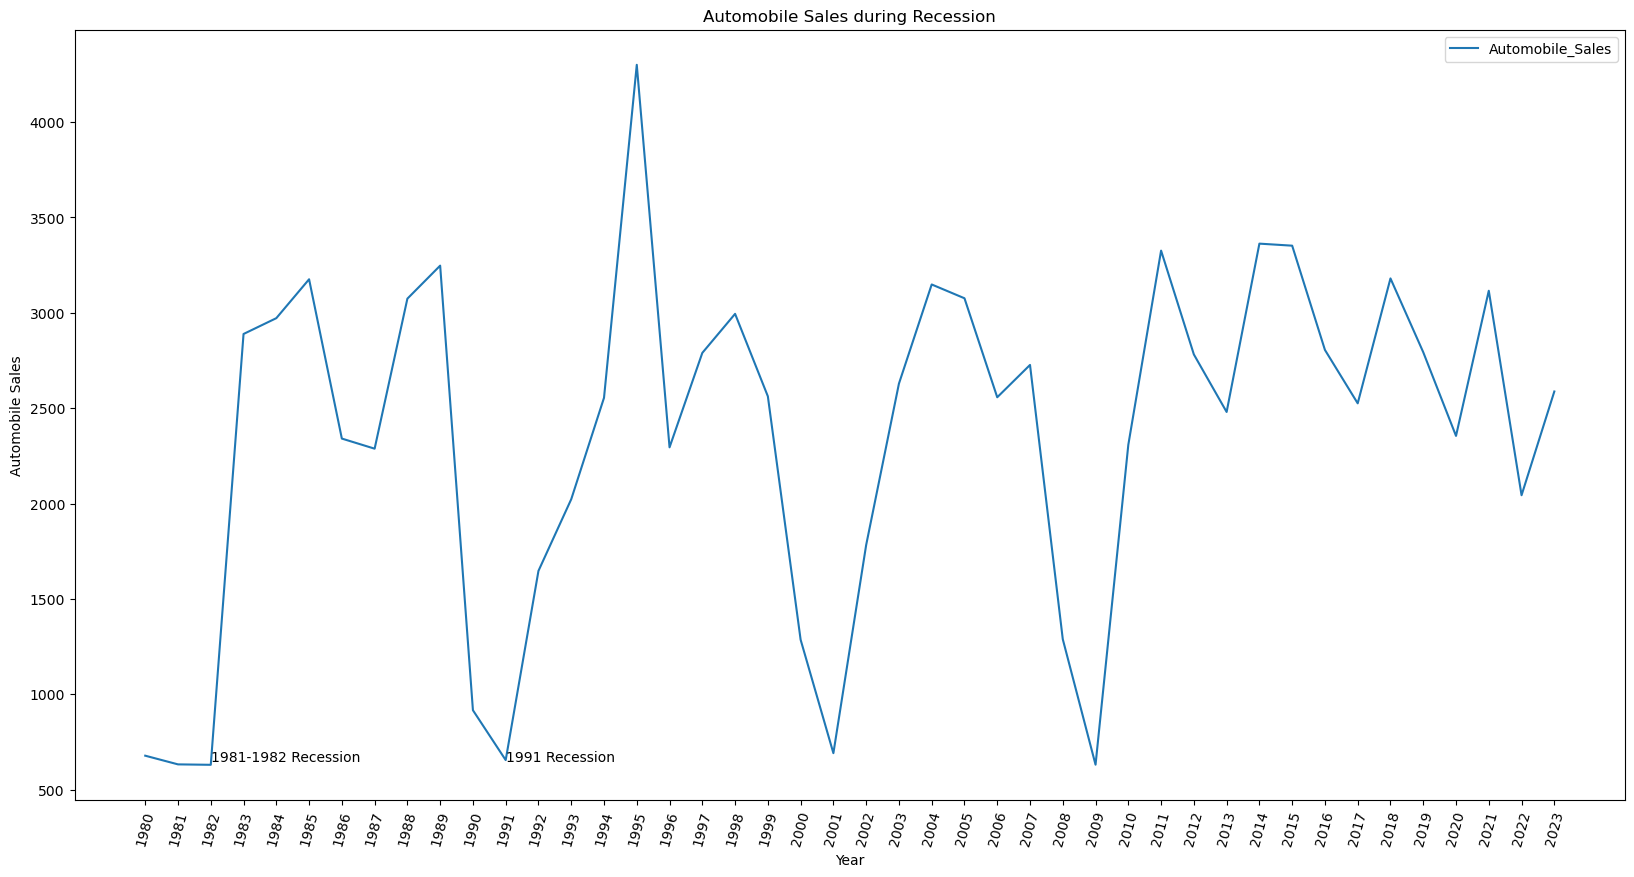

In [6]:
plt.figure(figsize=(20, 10))
df_totalSales.plot(kind='line')
plt.title("Automobile Sales during Recession")
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.text(1982, 650, '1981-1982 Recession')
plt.text(1991, 650, '1991 Recession')
plt.legend()
plt.savefig('/Users/kumardi/Desktop/Projects/Line_Plot_1.png')
plt.show()

In [7]:
df_vt_mean = df.groupby(["Year", "Vehicle_Type"], as_index=False)["Automobile_Sales"].mean()
df_vt_mean.head()

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,720.625000
1,1980,Smallfamiliycar,695.233333
2,1980,Supperminicar,635.840000
3,1981,Mediumfamilycar,628.400000
4,1981,Smallfamiliycar,638.420000


In [8]:
df_vt_mean.set_index('Year', inplace=True)
df_vt_mean.head()

,Vehicle_Type,Automobile_Sales
Year,,
1980,Mediumfamilycar,720.625000
1980,Smallfamiliycar,695.233333
1980,Supperminicar,635.840000
1981,Mediumfamilycar,628.400000
1981,Smallfamiliycar,638.420000


In [9]:
df_vt_mean = df_vt_mean.groupby('Vehicle_Type')['Automobile_Sales']
df_vt_mean.head()

Year
1980     720.625000
1980     695.233333
1980     635.840000
1981     628.400000
1981     638.420000
1981     630.900000
1982     723.271429
1982     602.225000
1982     102.000000
1983    4120.200000
1983    3211.400000
1983    1676.866667
1983    3999.350000
1983    2338.550000
1984    3130.800000
1984    4099.900000
1984    2058.600000
1984    2514.000000
1984    2805.300000
1985    3630.666667
1985    3534.200000
1986    1581.500000
1986    2913.333333
1986    1392.833333
1987    2225.333333
Name: Automobile_Sales, dtype: float64

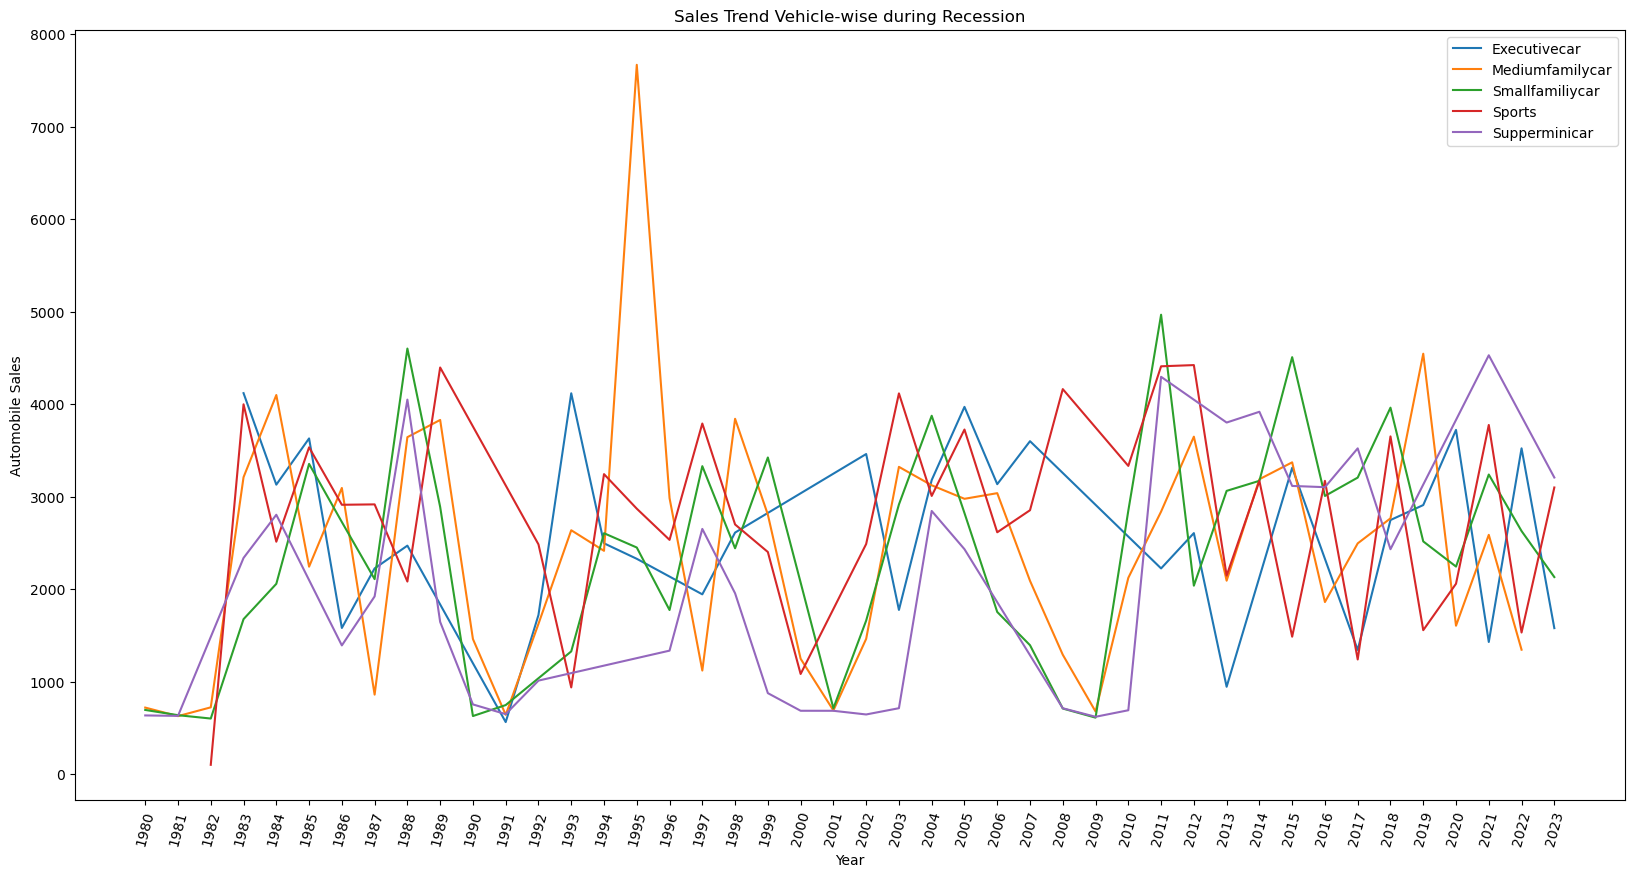

In [10]:
plt.figure(figsize=(20, 10))
df_vt_mean.plot(kind='line')
plt.title("Sales Trend Vehicle-wise during Recession")
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.legend()
plt.savefig('/Users/kumardi/Desktop/Projects/Line_Plot_2.png')
plt.show()

In [11]:
df_new = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
df_new.head()

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


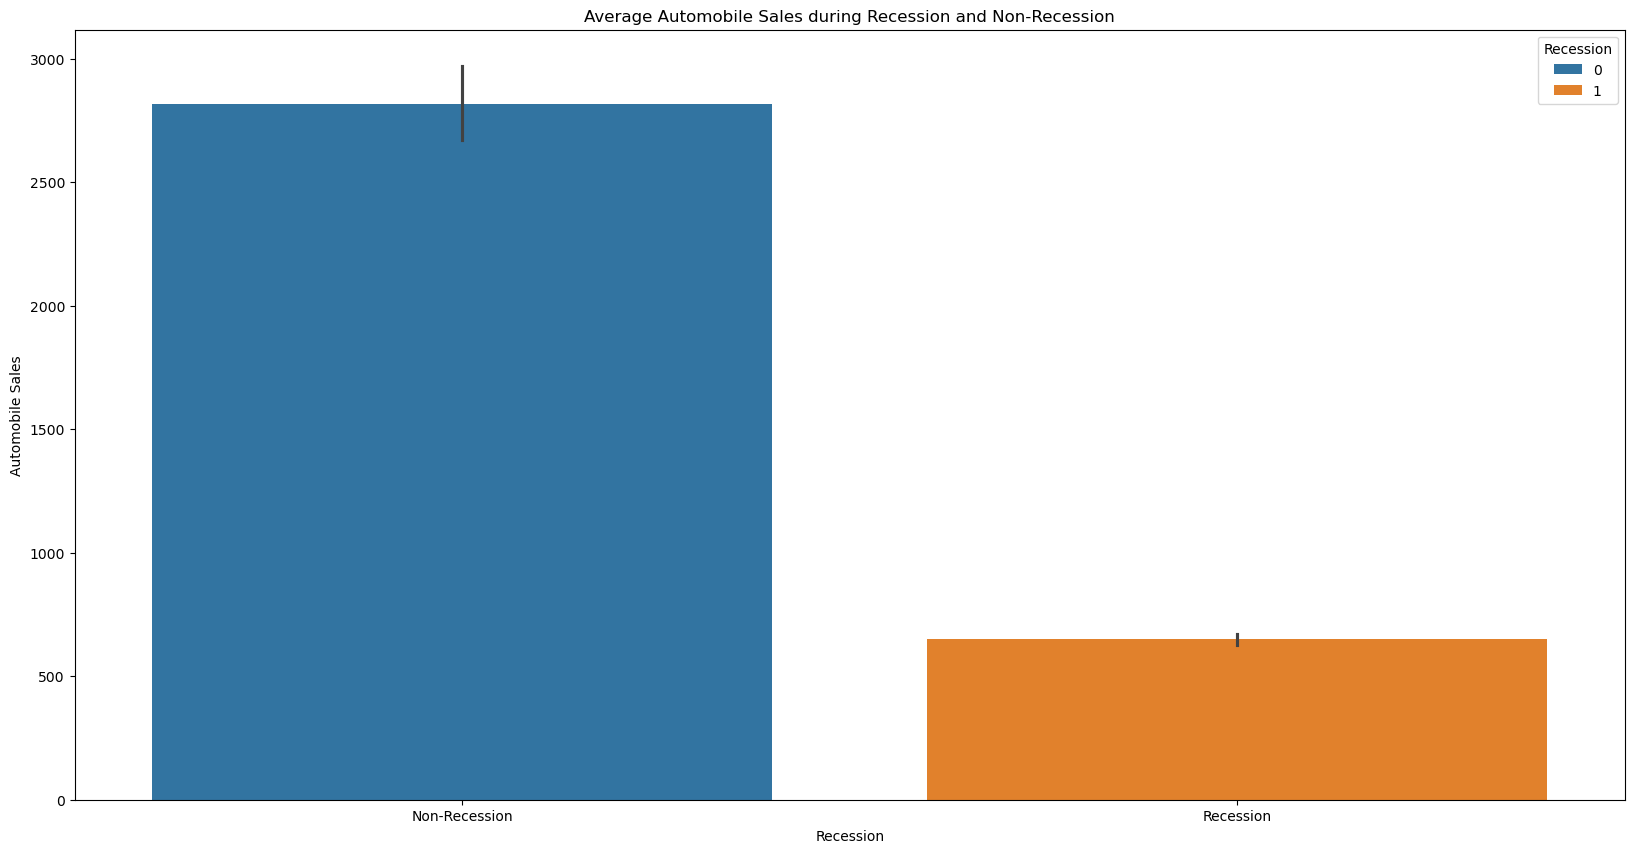

In [12]:
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Recession', y='Automobile_Sales', hue='Recession')
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[1, 0], labels=['Recession', 'Non-Recession'])
plt.show()

In [13]:
recession_data = df[df['Recession'] == 1]
recession_data.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [14]:
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
dd.head()

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222


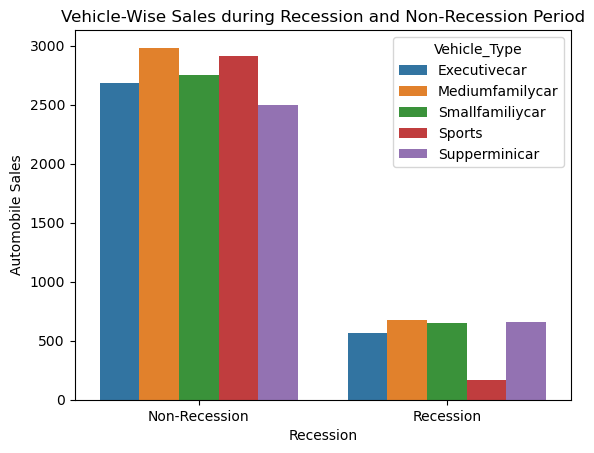

In [15]:
sns.barplot(data=dd, x='Recession', y='Automobile_Sales', hue='Vehicle_Type')
plt.xticks(ticks=[1, 0], labels=['Recession', 'Non-Recession'])
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.savefig('/Users/kumardi/Desktop/Projects/Bar_Chart.png')
plt.show()

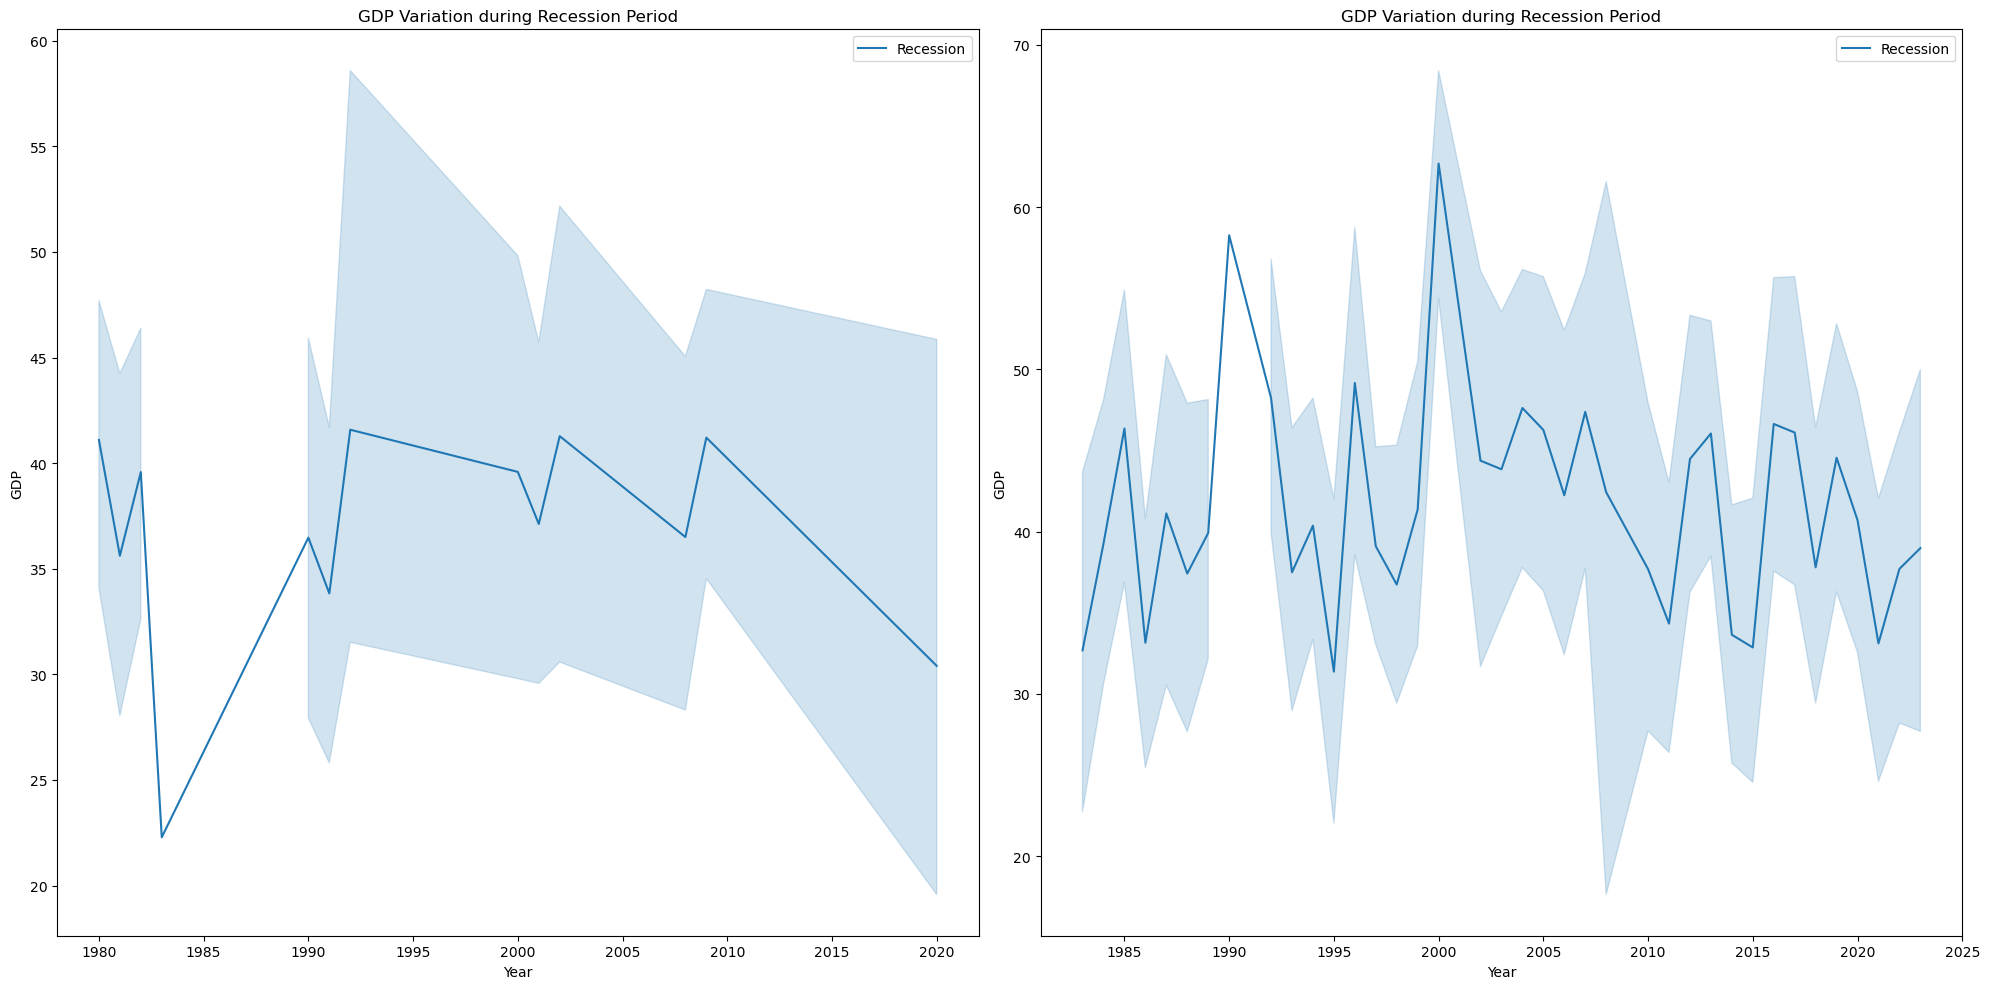

In [16]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig = plt.figure(figsize=(20, 10))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel("Year")
ax0.set_ylabel("GDP")
ax0.set_title('GDP Variation during Recession Period')

sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession', ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP")
ax1.set_title('GDP Variation during Recession Period')


plt.tight_layout()
plt.savefig('/Users/kumardi/Desktop/Projects/Subplot.png')
plt.show()


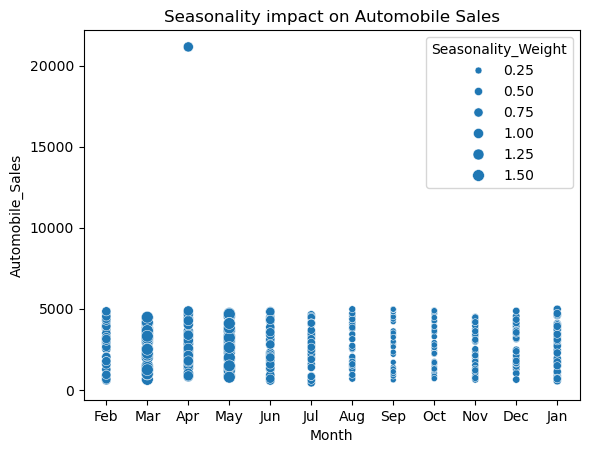

In [17]:
non_rec_data = df[df['Recession'] == 0]
size=non_rec_data['Seasonality_Weight'] #for bubble effect    
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
plt.xlabel("Month")
plt.ylabel("Automobile_Sales")
plt.title('Seasonality impact on Automobile Sales')
plt.savefig('/Users/kumardi/Desktop/Projects/Bubble.png')
plt.show()

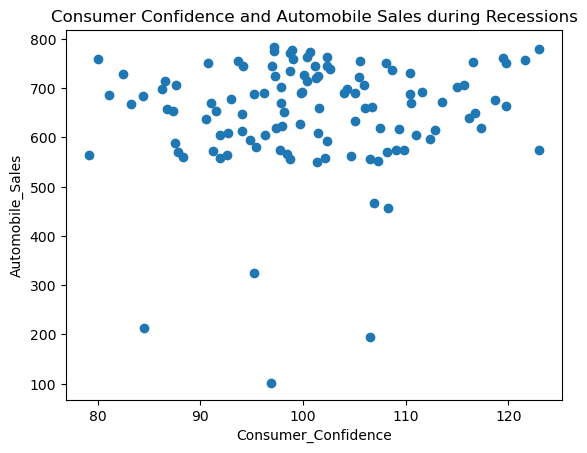

In [18]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel("Consumer_Confidence")
plt.ylabel("Automobile_Sales")
plt.title("Consumer Confidence and Automobile Sales during Recessions")
plt.show()

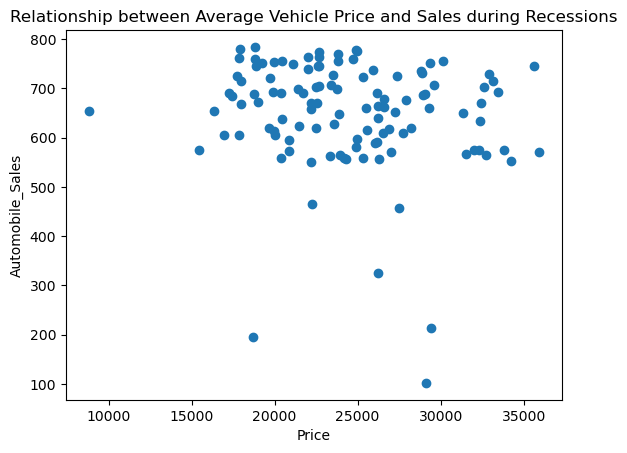

In [19]:
rec_data = df[df['Recession'] == 1]
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel("Price")
plt.ylabel("Automobile_Sales")
plt.title("Relationship between Average Vehicle Price and Sales during Recessions")
plt.savefig('/Users/kumardi/Desktop/Projects/Scatter.png')
plt.show()

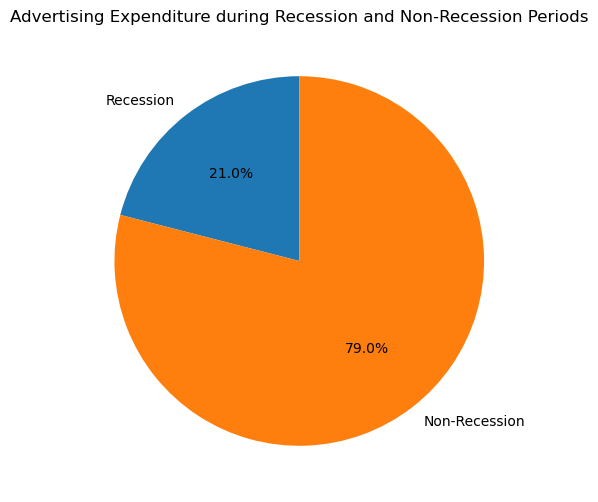

In [20]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.savefig('/Users/kumardi/Desktop/Projects/Pie_1.png')

plt.show()

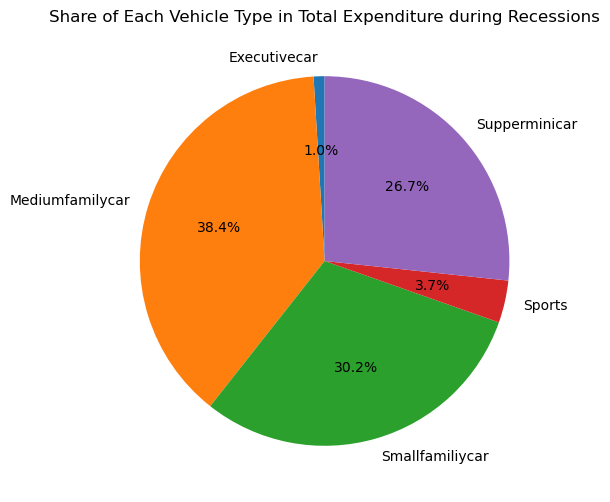

In [21]:
Rdata = df[df['Recession'] == 1]

VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.savefig('/Users/kumardi/Desktop/Projects/Pie_2.png')
plt.show()

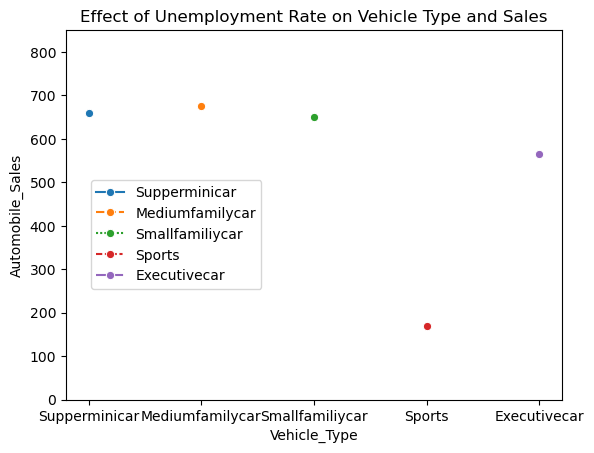

In [22]:
df_rec = df[df['Recession']==1]

sns.lineplot(data=df_rec, x='Vehicle_Type', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', marker='o', err_style=None)
plt.ylim(0,850)
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.legend(loc=(0.05,.3))
plt.savefig('/Users/kumardi/Desktop/Projects/line_plot_3.png')
plt.show()